<div id="top">
<a href="https://archive.ics.uci.edu/ml/datasets/wine+quality"><h1>Wine Quality Prediction</h1></a>
<br>
Wine drinking was—and is—something that people seem to love universally.Wine drinkers are fancy, conscientious, and smart. They know a lot about wine and are able to enjoy it by using their sophisticated taste palates. Wine are having many health benefits as well. So when it comes to wine, every person has different taste of wine which they can't compromise on. Some people like red wine whereas some like white. So here we came up with wine data that tells the quality of wine based on the ingredients.Let's analyze what people majory like in the wine. 
<br>
    
<table><tr>
<td> <img src="images/wine3.jpg" alt="Wine" style="width: 600px;height:250px"/> </td>
<td> <img src="images/wine1.jpg" alt="Wine" style="width: 600px;height:250px"/> </td>
</tr></table>
<br>
<a href="https://www.2hawk.wine/2019/02/13/how-does-wine-fermentation-work/#:~:text=Fermentation%20is%20the%20process%20by,alcohol%20production%20going%20on%2C%20though."><h3>Wine Fermentation Process</h3></a>  
<br>
<a href="https://www.2hawk.wine/2019/02/13/how-does-wine-fermentation-work/#:~:text=Fermentation%20is%20the%20process%20by,alcohol%20production%20going%20on%2C%20though."><img src="images/wine4.jpe" alt="Wine" style="width: 600px;height:250px"/></a> 



<h3>Project Objective:</h3>
The main objective is to learn how different ML models can be useful in the prediction and how much important Exploratory Data Analysis and Feature Engineering is?
<br>


<h3>Technologies and Environment Used:</h3>
<img src="images/Technologies4.jpg" alt="Libraries used" style="width: 400px;height:160px"/> 


<h3><u><i>Project Pipeline</h3>
<ol><h3>
<li>Importing Data and Libraries</li>
<li>Exploratary Data Analysis</li>
<li>Feature Engineering</li>
<li>Feature Selection</li>
<li>Building Model & Model Tuning</li>
<li>Blending</li>
<li>Learnings & Conclusion</li>
<li>Credits & References</li>
</h3></ol>
<h3>Want to learn more: <a href="https://github.com/vishalgarg1994/Data-Science-Portfolio"> https://github.com/vishalgarg1994/Data-Science-Portfolio</a></h3>
</div>

<h3> 1. Importing Data and Libraries</h3>

In [84]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,StackingClassifier
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [8]:
redwine = pd.read_csv('data/winequality_red.csv')
whitewine = pd.read_csv('data/winequality_white.csv')

<h3> 2. Exploratory Data Analyses</h3>

In [4]:
print(redwine.shape)
print(whitewine.shape)

(1599, 12)
(4898, 12)


In [9]:
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
whitewine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


<h3>Data Description</h3>
<ol>
    <li><b>Fixed acidity:</b>The predominant fixed acids found in wines are tartaric, malic, citric, and succinic. Their respective levels found in wine can vary greatly</li>
    <li><b>Volatile acidity:</b>Volatile acidity refers to the steam distillable acids present in wine, primarily acetic acid but also lactic, formic, butyric, and propionic acids</li>
    <li><b>Citric acid:</b>Citric acid is often added to wines to increase acidity, complement a specific flavor or prevent ferric hazes.Since bacteria use citric acid in their metabolism, it may increase the growth of unwanted microbes</li>
    <li><b>Residual sugar:</b>Basically, residual sugar or 'RS' is the sugar from the grapes that's left over after fermentation.The residual sugar remaining in a dry wine is usually around 1 to 2 g/L.</li>
    <li><b>Chlorides:</b>It significantly contributes the wine's sensory characteristics, affecting color, clearness, flavor and aroma</li>
    <li><b>Free sulfur dioxide:</b>'Free' SO2 is that which is unbound to compounds in the wine and is therefore able to exert an antioxidant/preservative action.</li>
    <li><b>Total sulfur dioxide:</b>Sulfur Dioxide is naturally found in wines and is a byproduct of fermentation, but most winemakers choose to add a little extra to prevent the growth of undesirable yeasts and microbes, as well as to protect against oxidation.</li>
    <li><b>Density:</b>While water has a density of 1 gram per cubic centimeter, alcohol has a density of about 0.79 g/cc, at equal pressure and temperature. The more alcohol vs other liquids a wine contains should decrease the overall density of the wine</li>
    <li><b>pH:</b>White wines are usually more acidic, falling between 3.0 to 3.4. ... Even slight changes in pH can influence a wine's taste, color, and smell. Wines with lower acidity (and thus higher pH numbers) are also more prone to bacterial problems. Acidity can have a huge impact on the wine fermentation process.</li>
    <li><b>Sulphates</b>Most sulphates found in wine are sulfur dioxide molecules and sulfite ions. ... The presence of another type of sulfate, sulfur dioxide, is thought to help rid the wine of a wide variety of bacteria (good and bad); this seems to lower the wine quality as well because it dulls the wine's fermentation process</li>
    <li><b>Alcohol:</b> Alcohal % in wine</li>
    <li><b>Quality:</b> Quality score of wine. It willbe b/w 0-10</li>
</ol>

In [106]:
redwine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<h4>Checking for Null Values</h4>

In [18]:
print(sum(redwine.isnull().sum()))
print(sum(whitewine.isnull().sum()))

0
0


Text(0.5, 1.0, 'Red Wine')

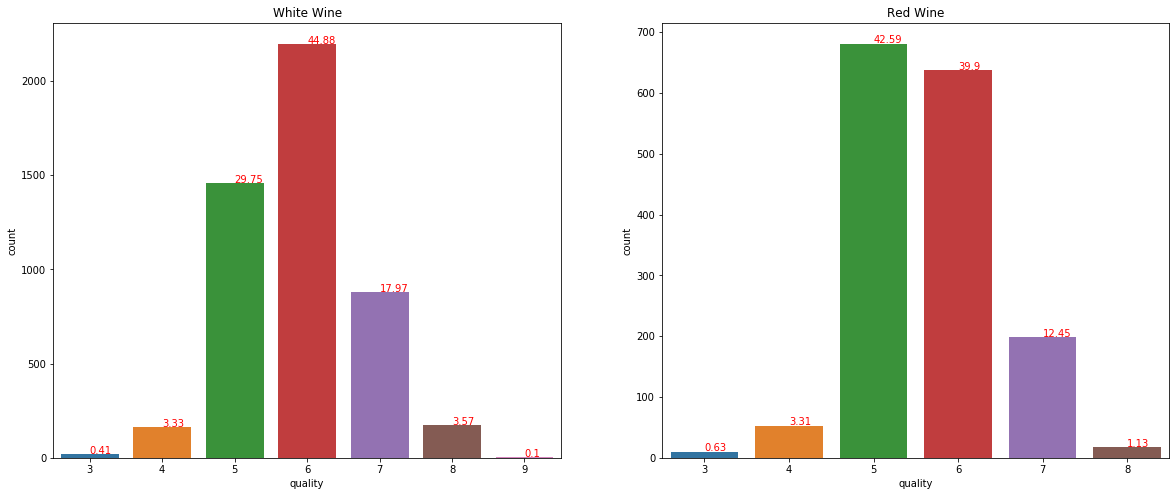

In [101]:
fig, axes =plt.subplots(1,2,figsize=(20,8))
s = whitewine.quality.value_counts().sort_index()
ax = sns.countplot(whitewine.quality,ax = axes[0])
for i, v in s.reset_index().iterrows():
   ax.text(i, v.quality + 0.9 , round(100*v.quality/sum(s),2), color='red')
s = redwine.quality.value_counts().sort_index()
ax = sns.countplot(redwine.quality,ax = axes[1])
for i, v in s.reset_index().iterrows():
   ax.text(i, v.quality + 0.9 , round(100*v.quality/sum(s),2), color='red')
axes[0].set_title("White Wine")
axes[1].set_title("Red Wine")

<h3>Above figure Compares White wine quality with Red wines</h3>
<br>
Seems like, in the Data given, white whine has better quality score in comparison to red

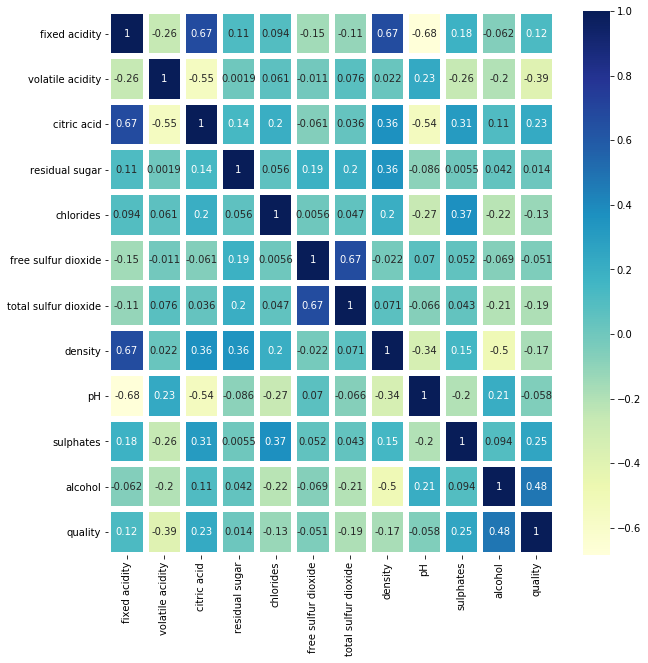

In [85]:
f, axes = plt.subplots(0, 0, figsize=(10, 10))
sns.heatmap(redwine.corr(),cmap='YlGnBu',linewidths=5,annot=True)

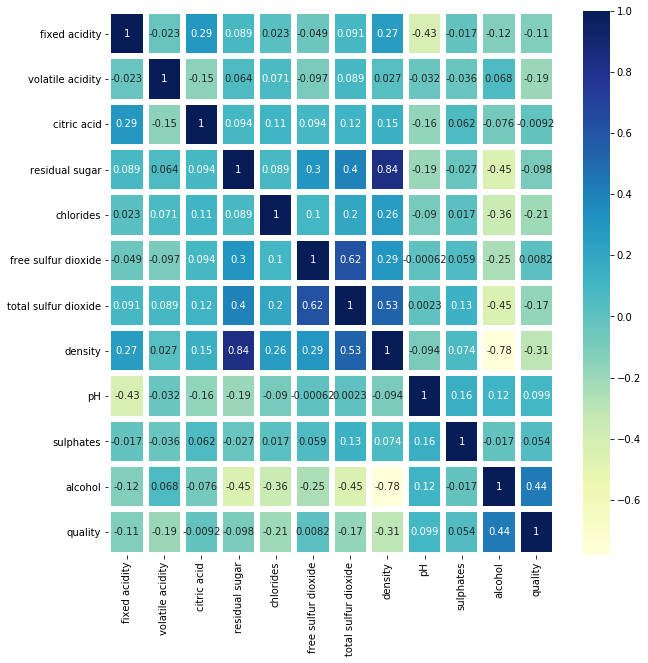

In [84]:
f, axes = plt.subplots(0, 0, figsize=(10, 10))
sns.heatmap(whitewine.corr(),cmap='YlGnBu',linewidths=5,annot=True)

<h4>Both wines seems to have a good +ve correlation with alchol</h4>

In [120]:
def bplot(feature):
    '''This function will plot a boxplot of feature given against wine quality for both red and white wine'''
    f, axes = plt.subplots(1, 2, figsize=(15, 5))
    axes[0].set_title("White Wine")
    axes[1].set_title("Red Wine")
    sns.boxplot(whitewine.quality,whitewine[feature],ax=axes[0])
    sns.boxplot(redwine.quality,redwine[feature],ax=axes[1])

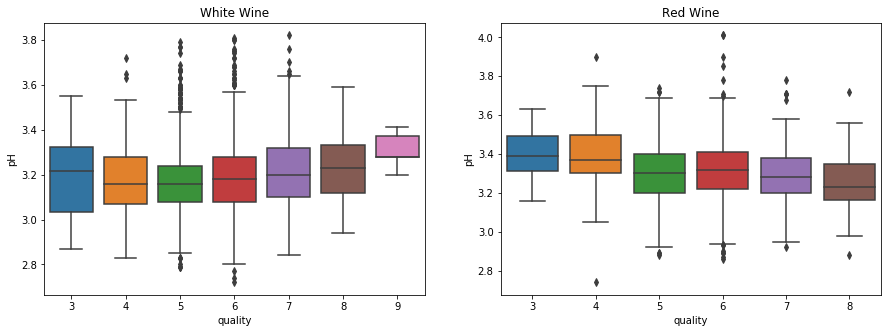

In [105]:
bplot('pH')

<h5>pH value in White wine tends to increase with pH Value whereas it is reverse case in red wine</h5>

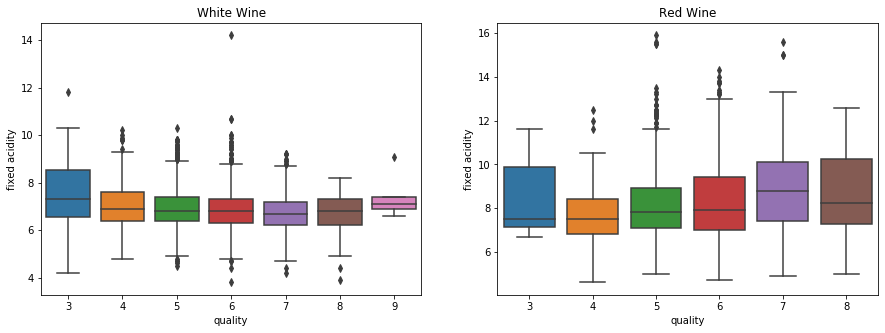

In [107]:
bplot('fixed acidity')

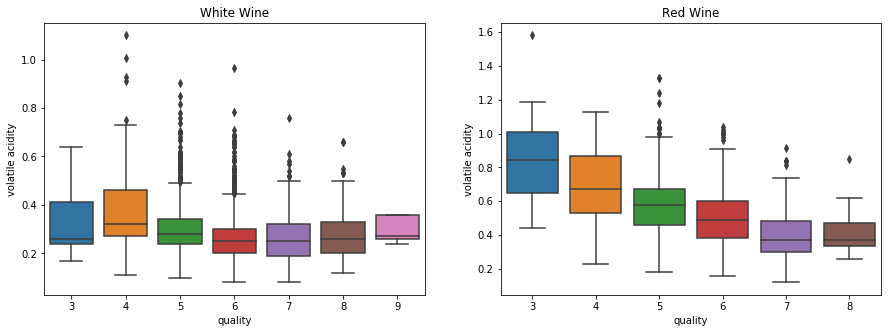

In [108]:
bplot('volatile acidity')

<h5>White wine doesn't show any promisable trend, but in red wine volatile acidity is inversly propotional to quality</h5>

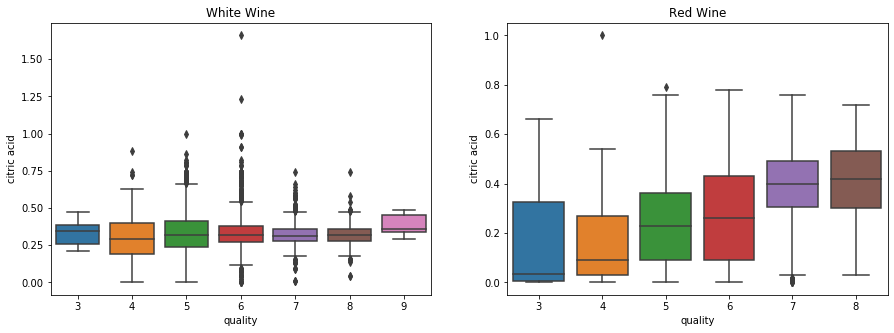

In [109]:
bplot('citric acid')

<h5>White wine doesn't show any promisable trend, but in red wine citric acid is directly propotional to quality</h5>

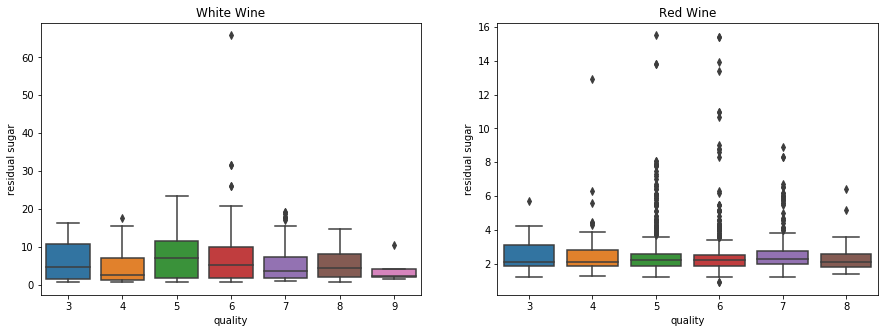

In [110]:
bplot('residual sugar')

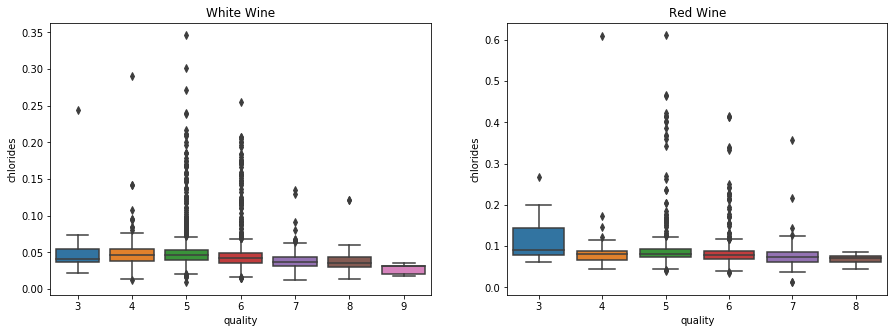

In [111]:
bplot('chlorides')

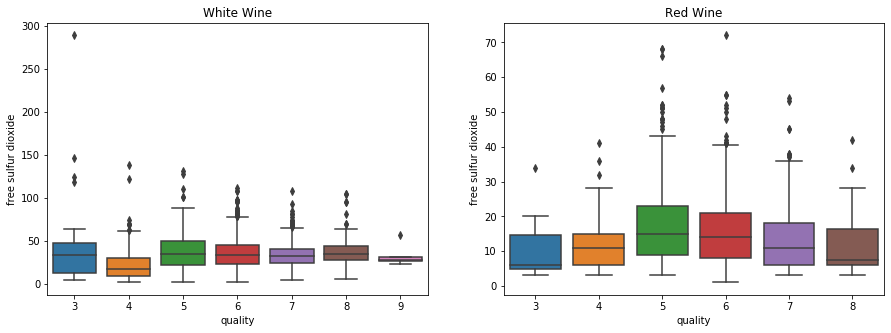

In [113]:
bplot('free sulfur dioxide')

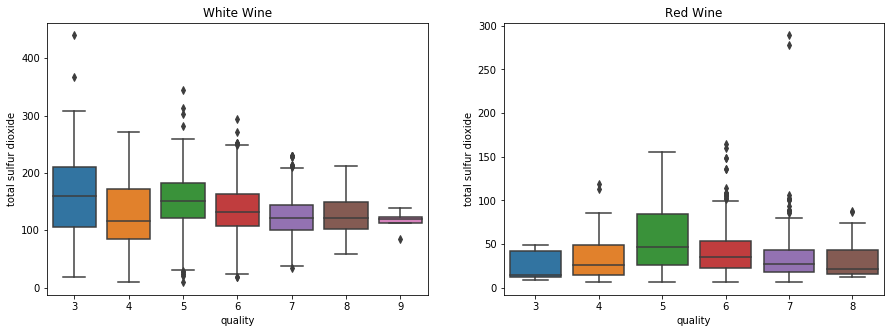

In [114]:
bplot('total sulfur dioxide')

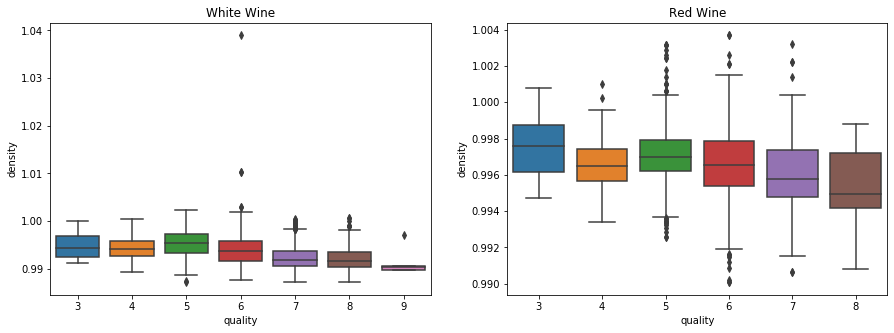

In [115]:
bplot('density')

<h5>Lower the density, quality is good.This proves While water has a density of 1 gram per cubic centimeter, alcohol has a density of about 0.79 g/cc, at equal pressure and temperature. The more alcohol vs other liquids a wine contains should decrease the overall density and quality of the wine</h5>

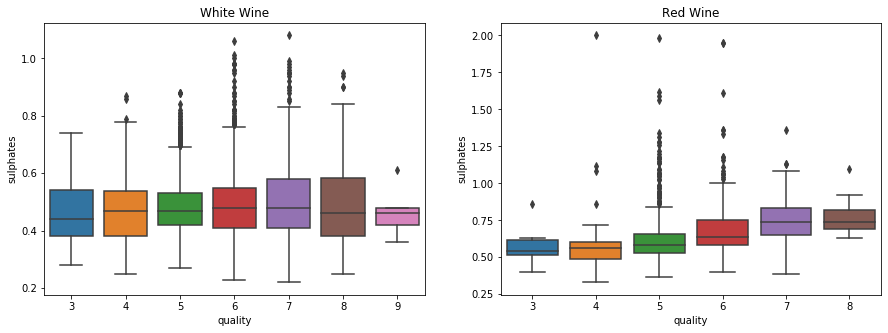

In [116]:
bplot('sulphates')

<h5>Most sulphates found in wine are sulfur dioxide molecules and sulfite ions.The presence of another type of sulfate, sulfur dioxide, is thought to help rid the wine of a wide variety of bacteria (good and bad); this seems to lower the wine quality as well because it dulls the wine's fermentation process. So red wine proves this statement</h5>

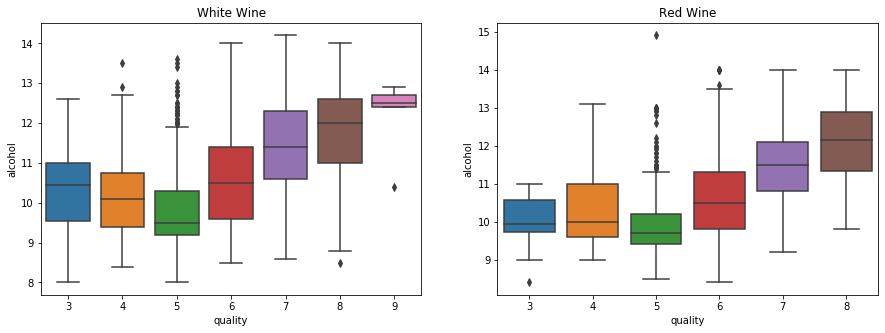

In [118]:
bplot('alcohol')

<h5>More the alcohol level better the quality.That's what we have seen earlier in the correlation as well</h5>

<h3>3. Feature Engineering</h3>

In [9]:
redwine_copy = redwine.copy()
whitewine_copy = whitewine.copy()
r_output_var = redwine.pop('quality')
w_output_var = whitewine.pop('quality')

<h4>Checking for Outliers</h4>

Text(0.5, 1.0, 'Red wine data before outliers removal')

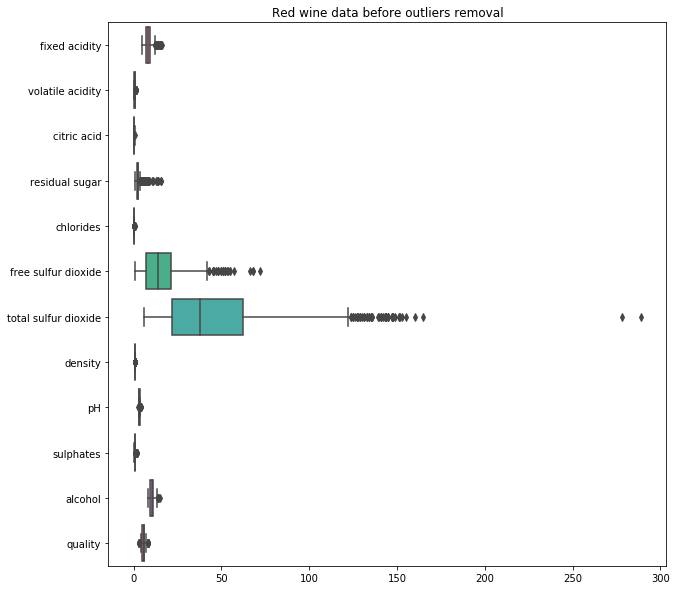

In [36]:
f, axes = plt.subplots(0, 0, figsize=(10, 10))
sns.boxplot(data=redwine_copy,orient='h')
plt.title("Red wine data before outliers removal")

Text(0.5, 1.0, 'White wine data before outliers removal')

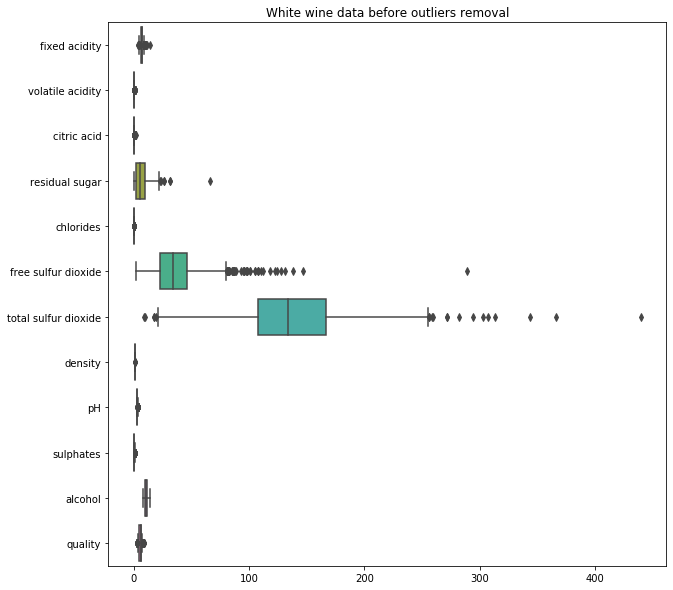

In [21]:
f, axes = plt.subplots(0, 0, figsize=(10, 10))
sns.boxplot(data=whitewine_copy,orient='h')
plt.title("White wine data before outliers removal")

In [16]:
from scipy import special
def norm(df):
    numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numerics2 = []
    for i in df.columns:
        if df[i].dtype in numeric_dtypes:
            numerics2.append(i)
    skew_features = df[numerics2].apply(lambda x: stats.skew(x)).sort_values(ascending=False)
    high_skew = skew_features[skew_features > 0.5]
    skew_index = high_skew.index
    for i in skew_index:
       df[i] = special.boxcox1p(df[i], stats.boxcox_normmax(df[i] + 1))
    return df

In [22]:
redwine = norm(redwine)
whitewine = norm(whitewine)

Text(0.5, 1.0, 'Red wine data after outliers removal')

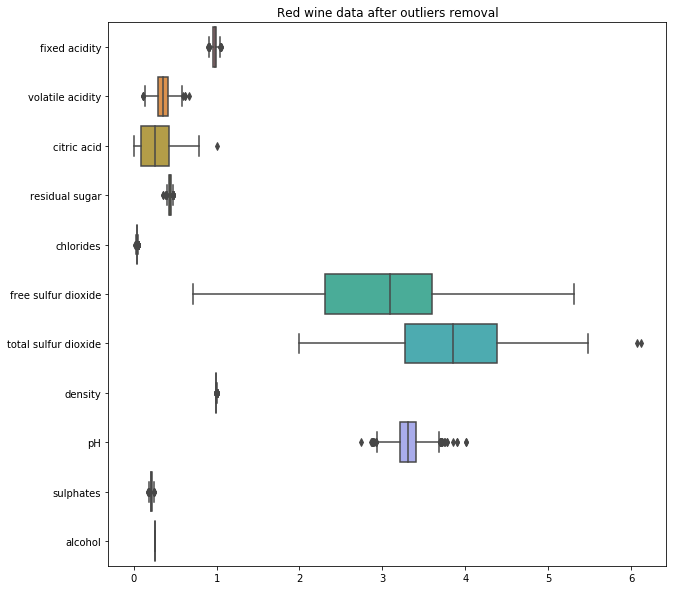

In [20]:
f, axes = plt.subplots(0, 0, figsize=(10, 10))
sns.boxplot(data=redwine,orient='h')
plt.title("Red wine data after outliers removal")

Text(0.5, 1.0, 'White wine data after outliers removal')

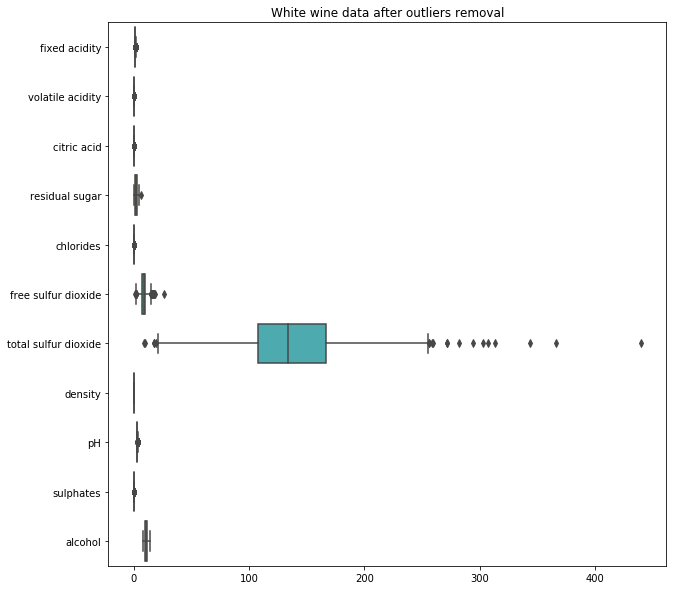

In [23]:
f, axes = plt.subplots(0, 0, figsize=(10, 10))
sns.boxplot(data=whitewine,orient='h')
plt.title("White wine data after outliers removal")

<h3>References on, how to deal with outliers</h3>
<ol>
<li><a href="https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba">https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba</a></li>
<li><a href="https://medium.com/analytics-vidhya/outlier-treatment-9bbe87384d02">https://medium.com/analytics-vidhya/outlier-treatment-9bbe87384d02</a></li>
<li><a href="https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/">https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/</li>
</ol>

<h5>Now we will divide the wine quality in 3 categories Low, Medium and High which will be represented as 0,1,2 respectively.</h5>

In [29]:
r_output_var = r_output_var.apply(lambda x: 0 if x<5 else 2 if x>6 else 1)
w_output_var = w_output_var.apply(lambda x: 0 if x<5 else 2 if x>7 else 1)

In [34]:
print(round(100*r_output_var.value_counts()/len(r_output_var)),2)
print(round(100*w_output_var.value_counts()/len(w_output_var)),2)

1    82.0
2    14.0
0     4.0
Name: quality, dtype: float64 2
1    93.0
0     4.0
2     4.0
Name: quality, dtype: float64 2


<h4>Let's work on White wine dataset here.</h4>

In [39]:
X_train,X_test,y_train,y_test = train_test_split(whitewine,w_output_var,test_size=0.2,random_state = 7)

In [41]:
print(round(100*y_train.value_counts()/len(y_train)),2)

1    93.0
2     4.0
0     4.0
Name: quality, dtype: float64 2


<h4>Our Train dataset looks very imbalanced, let's make it balanced and then train it</h4>

In [45]:
smk = SMOTETomek()
X_train,y_train = smk.fit_sample(X_train,y_train)

In [46]:
print(round(100*y_train.value_counts()/len(y_train)),2)

2    33.0
0    33.0
1    33.0
Name: quality, dtype: float64 2


In [48]:
print(X_train.shape,y_train.shape)

(10827, 11) (10827,)


<h5>Now we are good with the data. Let's see the feature importances</h5>

<h3>4. Feature Selection</h3>

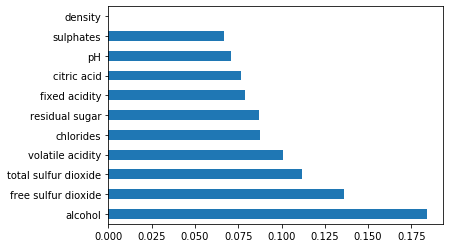

In [51]:
etc = ExtraTreesClassifier()
etc.fit(X_train,y_train)
feat_importance = pd.Series(etc.feature_importances_,index=X_train.columns)
feat_importance.nlargest(11).plot(kind='barh')

<h3>5. Model Building and Tuning</h3>

<h5>Let's try building models with full dataset. As training data is small so we can manage using all</h5>

In [59]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("Train Accuracy for RandomForestClassifier is: {}".format(metrics.accuracy_score(y_train,y_pred_train)))
print("Test Accuracy for RandomForestClassifier is: {}".format(metrics.accuracy_score(y_test,y_pred_test)))

Train Accuracy for RandomForestClassifier is: 1.0
Test Accuracy for RandomForestClassifier is: 0.8989795918367347


In [60]:
model = GradientBoostingClassifier()
model.fit(X_train,y_train)
y_pred_train1 = model.predict(X_train)
y_pred_test1 = model.predict(X_test)
print("Train Accuracy for GradientBoostingClassifier is: {}".format(metrics.accuracy_score(y_train,y_pred_train1)))
print("Test Accuracy for GradientBoostingClassifier is: {}".format(metrics.accuracy_score(y_test,y_pred_test1)))

Train Accuracy for GradientBoostingClassifier is: 0.9121640343585481
Test Accuracy for GradientBoostingClassifier is: 0.7826530612244897


In [71]:
model = LogisticRegression(penalty='l2')
model.fit(X_train,y_train)
y_pred_train2 = model.predict(X_train)
y_pred_test2 = model.predict(X_test)
print("Train Accuracy for LogisticRegression is: {}".format(metrics.accuracy_score(y_train,y_pred_train2)))
print("Test Accuracy for LogisticRegression is: {}".format(metrics.accuracy_score(y_test,y_pred_test2)))

Train Accuracy for LogisticRegression is: 0.6069086542902005
Test Accuracy for LogisticRegression is: 0.45816326530612245


<h5>Logistic loss diverges faster than hinge loss. So, in general, it will be more sensitive to outliers.Logistic loss does not go to zero even if the point is classified sufficiently confidently. This might lead to minor degradation in accuracy.So we can have more error. So we may apply different techniques to tackle outliers.Links are given above.</h5>

In [74]:
model = AdaBoostClassifier()
model.fit(X_train,y_train)
y_pred_train3 = model.predict(X_train)
y_pred_test3 = model.predict(X_test)
print("Train Accuracy for AdaBoostClassifier is: {}".format(metrics.accuracy_score(y_train,y_pred_train3)))
print("Test Accuracy for AdaBoostClassifier is: {}".format(metrics.accuracy_score(y_test,y_pred_test3)))

Train Accuracy for AdaBoostClassifier is: 0.7266094024198763
Test Accuracy for AdaBoostClassifier is: 0.5275510204081633


Most of our models are overfitting. So what we can do is, use the cross validation technique with GridSearchCV to tune models

In [75]:
folds = KFold(n_splits=10,shuffle=True,random_state=7)

rf = RandomForestClassifier()
hyper_params_rf = [{
    'n_estimators':[10,50,100,500],
    'min_samples_split':[2,3,4,5],
    'max_depth':[2,5,7,30,50,100]
}]
model_rf = GridSearchCV(estimator=rf,
                       param_grid = hyper_params_rf,
                       scoring ='accuracy',
                       cv = folds,
                       verbose=1,
                       return_train_score=True,
                       n_jobs=16)
model_rf.fit(X_train,y_train)
model_rf.best_params_

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:  1.8min
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:  3.5min
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed: 11.7min
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed: 26.3min
[Parallel(n_jobs=16)]: Done 960 out of 960 | elapsed: 35.7min finished


{'max_depth': 100, 'min_samples_split': 2, 'n_estimators': 500}

In [81]:
model = RandomForestClassifier(max_depth=100,min_samples_split=2,n_estimators=500)
model.fit(X_train,y_train)
y_pred_train5 = model.predict(X_train)
y_pred_test5 = model.predict(X_test)

In [82]:
gb = GradientBoostingClassifier()
hyper_params_gb = [{
    'n_estimators':[10,50,100,200,500,1000],
    'learning_rate':[0.1,0.3,0.6,0.75],
    'min_samples_split':[2,3],
    'min_samples_leaf':[1,2]
}]
model_gb = GridSearchCV(estimator=gb,
                       param_grid = hyper_params_gb,
                       scoring ='accuracy',
                       cv = 2,
                       verbose=1,
                       return_train_score=True,
                       n_jobs=16)
model_gb.fit(X_train,y_train)
model_gb.best_params_

Fitting 2 folds for each of 96 candidates, totalling 192 fits


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:  2.0min
[Parallel(n_jobs=16)]: Done 192 out of 192 | elapsed: 23.5min finished


{'learning_rate': 0.3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [ ]:
model = GradientBoostingClassifier(n_estimators=1000,learning_rate=0.3,min_samples_split=2,min_samples_leaf=1)
model.fit(X_train,y_train)
y_pred_train6 = model.predict(X_train)
y_pred_test6 = model.predict(X_test)

<h3>6. Stacking</h3>

In [86]:
estimators = [('Gradient Boost',GradientBoostingClassifier()),
              ('RandomForest',RandomForestClassifier(max_depth=10,min_samples_split=2,n_estimators=500)),
             ]
reg = StackingClassifier(
      estimators=estimators,
      final_estimator=GradientBoostingClassifier())
reg.fit(X_train,y_train)
y_pred_train7 = reg.predict(X_train)
y_pred_test7 = reg.predict(X_test)
print("Train Accuracy for AdaBoostClassifier is: {}".format(metrics.accuracy_score(y_train,y_pred_train7)))
print("Test Accuracy for AdaBoostClassifier is: {}".format(metrics.accuracy_score(y_test,y_pred_test7)))

Train Accuracy for AdaBoostClassifier is: 0.9815276623256673
Test Accuracy for AdaBoostClassifier is: 0.8846938775510204


<h3>7. Learnings & Conclusion</h3>

<ol>
<li>Data distribution plays a very important role as many ML manyodels asssume Data to be in Normal or Guassian distribution</li>
<li>Outliers can degrade model performance a lot.There are many techniques to remove it,links are given in references</li>
<li>Imbalanced dataset canan affect model learning. So its better to use some sampling to make data balanced</li>
<li>Logistic Regression Used to perform very badly with Outliers</li>
<li>Here you can play with Stacking, example given above, with different kinds of models</li>
<li>Overfitting make your model more prone to variation for different input</li>
<li>You can use blending technique to achieve more powerful results</li>
<li>Same way you can try and play on Redwine datasets.</li>
<li>There is a lot, still we can perform in this project. This is just a test one to let the data science begginer knows how to use different techniques and how they impact</li>
</ol>

<h3>8. References</h3>

<ol>
<li><a href="https://www.2hawk.wine/2019/02/13/how-does-wine-fermentation-work/#:~:text=Fermentation%20is%20the%20process%20by,alcohol%20production%20going%20on%2C%20though.">https://www.2hawk.wine/2019/02/13/how-does-wine-fermentation-work/#:~:text=Fermentation%20is%20the%20process%20by,alcohol%20production%20going%20on%2C%20though.</a></li> 
<li><a href="https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba">https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba</a></li>
<li><a href="https://medium.com/analytics-vidhya/outlier-treatment-9bbe87384d02">https://medium.com/analytics-vidhya/outlier-treatment-9bbe87384d02</a></li>
<li><a href="https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/">https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/</li>
<li><a href="https://archive.ics.uci.edu/ml/datasets/wine+quality">https://archive.ics.uci.edu/ml/datasets/wine+quality</a>
</li>
<li><a href="https://www.youtube.com/user/krishnaik06/videos">https://www.youtube.com/user/krishnaik06/videos</a></li>
</ol>

<h2>Thanks!!!</h2>